# Real-Time Face Mask Detector with Python

### We will build a real-time system to detect whether the person on the webcam is wearing a mask or not. We will train the face mask detector model using Keras and OpenCV.

## Download the Dataset
### The dataset we are working on consists of images of people wearing masks and 686 images with people without masks.
#### Download the Dataset from Here https://data-flair.training/blogs/download-face-mask-data/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator

from keras.layers import *
from keras.models import Model, load_model

from keras.callbacks import TensorBoard, ModelCheckpoint

from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt

# Neural Network

#### This convolution network consists of two pairs of Conv and MaxPool layers to extract features from the dataset. Which is then followed by a Flatten and Dropout layer to convert the data in 1D and ensure overfitting. And then two Dense layers for classification.

In [3]:
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 35, 64)        0

# Constants

In [6]:
TRAINING_DIR = "/content/drive/My Drive/Dataset/train"

VALIDATION_DIR = "/content/drive/My Drive/Dataset/test"

# Pre-Processing

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=10, target_size=(150, 150))

Found 1306 images belonging to 2 classes.


In [8]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=10, target_size=(150, 150))

Found 194 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [10]:
validation_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

# Setup Check Point to save the best Model

#### Initialize a callback checkpoint to keep saving best model after each epoch while training

In [11]:
checkpoint_filepath = "/content/drive/MyDrive/My Drive/face.h5"
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', verbose=0, 
                             save_best_only=True, mode='auto')

# Training the Model

In [ ]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=20, validation_data=validation_generator, callbacks=[checkpoint])

Epoch 1/30


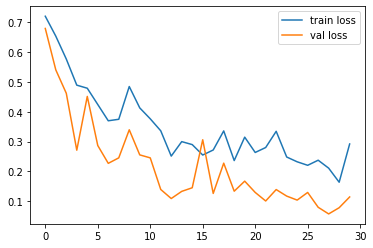

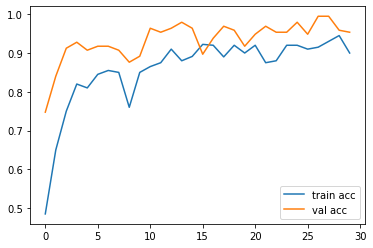

<Figure size 432x288 with 0 Axes>

In [ ]:
# Trainig & Testing Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Training & Testing Accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')